# 확진환자, 누적 - 일별 집계 시각화
# 키워드 검색 랭크 시각화 
#### 관측 기간 : 2020, 1월 ~ 6월

> 1. 키워드 검색률 ( 시간 순 )
> 2. 누적 확진자 수 ( 시간 순 )
> 3. 일별 확진자 수 ( 시간 순 )
> 4. 누적 확진자 수 x 키워드 검색률 ( 시간 순 )
> 5. 일별 확진자 수 x 키워드 검색률 ( 시간 순 )
> 6. 누적 확진자 수 x 일별 확진자 수 
 ( 시간 순 )

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
timeAge_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/UPS/2020dataPackage/COVID19_data/TimeAge.csv", encoding='CP949')

timeAge_df = timeAge_df[["age","confirmed"]]
timeAge_df.describe()

,confirmed
count,1089.000000
mean,1158.129477
std,822.619497
min,32.000000
25%,530.000000
50%,1052.000000
75%,1537.000000
max,3362.000000


In [32]:
timeAge_df

,age,confirmed
0,0s,32
1,10s,169
2,20s,1235
3,30s,506
4,40s,633
...,...,...
1084,40s,1681
1085,50s,2286
1086,60s,1668
1087,70s,850


In [33]:
timeAge = timeAge_df.to_numpy()

print(timeAge[:20])
def extract(slotList, ageNum):
  for i in range(0,121):
    slotList = np.concatenate((slotList,timeAge[i*9+ageNum, 1:2]),axis = 0)
  
  return np.expand_dims(slotList, axis=1)

[['0s' 32]
 ['10s' 169]
 ['20s' 1235]
 ['30s' 506]
 ['40s' 633]
 ['50s' 834]
 ['60s' 530]
 ['70s' 192]
 ['80s' 81]
 ['0s' 34]
 ['10s' 204]
 ['20s' 1417]
 ['30s' 578]
 ['40s' 713]
 ['50s' 952]
 ['60s' 597]
 ['70s' 224]
 ['80s' 93]
 ['0s' 34]
 ['10s' 233]]


In [34]:
list0 = [] 
list0 = extract(list0, 0)
list1 = [] 
list1 = extract(list1, 1)
list2 = [] 
list2 = extract(list2, 2)
list3 = [] 
list3 = extract(list3, 3)
list4 = [] 
list4 = extract(list4, 4)
list5 = [] 
list5 = extract(list5, 5)
list6 = [] 
list6 = extract(list6, 6)
list7 = [] 
list7 = extract(list7, 7)
list8 = [] 
list8 = extract(list8, 8)

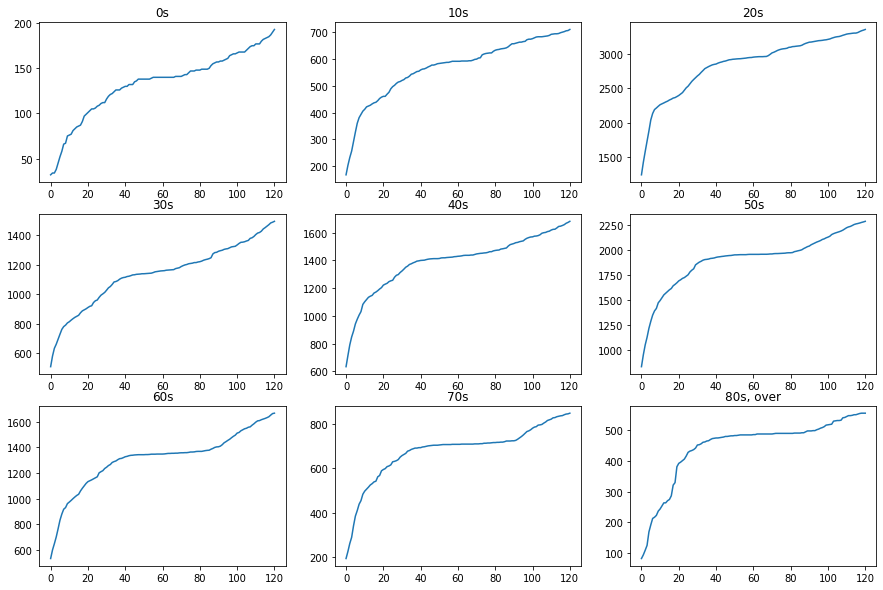

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

titleZip = ["0s","10s","20s","30s","40s","50s","60s","70s","80s, over"]
listZip = [list0,list1,list2, list3,list4,list5, list6,list7,list8]

for index, title, lists in zip(range(1,10), titleZip, listZip):
  plt.subplot(3,3,index)
  plt.plot(range(0,121), lists)
  plt.title(title)


In [36]:
search_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/UPS/2020dataPackage/COVID19_data/SearchTrend.csv", encoding='CP949')
time_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/UPS/2020dataPackage/COVID19_data/Time.csv", encoding='CP949')
search_df

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [37]:
time =time_df[['date','confirmed']].to_numpy()

search = search_df.to_numpy()
search2020 = search[-181:]

search2020_1 = search2020[:31]
search2020_2 = search2020[31:31+29]
search2020_3 = search2020[60:60+31]
search2020_4 = search2020[91:121]
search2020_5 = search2020[121:152]
search2020_6 = search2020[152:]

time1 = time[:12]
time2 = time[12:12+29]
time3 = time[41 :41+31]
time4 = time[72:102]
time5 = time[102:102+31]
time6 = time[133:]





In [38]:
temp = np.concatenate((search2020_1[:19, 0:2],time1), axis=0)

for i in range(0,20):
  temp[:i, 1] = 0

time1 = temp.copy()

In [39]:
dayby = time.copy()

dayby.shape

for i in range(1,163):
  dayby[i, 1] = time[i,1] - time[i-1,1]

dayby1 = dayby[:12]
dayby2 = dayby[12:12+29]
dayby3 = dayby[41 :41+31]
dayby4 = dayby[72:102]
dayby5 = dayby[102:102+31]
dayby6 = dayby[133:]



In [40]:
temp = np.concatenate((time1[:19],dayby1[:19, 0:2]), axis=0)

for i in range(0,20):
  temp[:i, 1] = 0

dayby1 = temp.copy()

timeList = [time1,time2,time3,time4,time5,time6]
dayList = [dayby1,dayby2,dayby3,dayby4,dayby5,dayby6]
titleZip = ["2020_1","2020_2","2020_3","2020_4","2020_5","2020_6"]
searchList = [search2020_1,search2020_2,search2020_3,search2020_4,search2020_5,search2020_6]
dayScope = [[0,6], [0,900],[0,1000],[0,150],[0,100],[0,100] ]
stackScope = [[0,12], [0,3000],[3000,10000],[9000,11000],[10000,12000],[11000,13000] ]

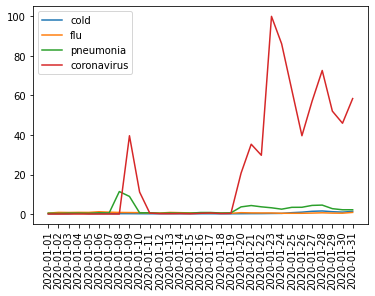

In [41]:
plt.plot(search2020_1[:,0], search2020_1[:,1], label="cold")
plt.plot(search2020_1[:,0], search2020_1[:,2], label="flu")
plt.plot(search2020_1[:,0], search2020_1[:,3], label="pneumonia")
plt.plot(search2020_1[:,0], search2020_1[:,4], label="coronavirus")
plt.xticks(rotation='vertical')
plt.legend()

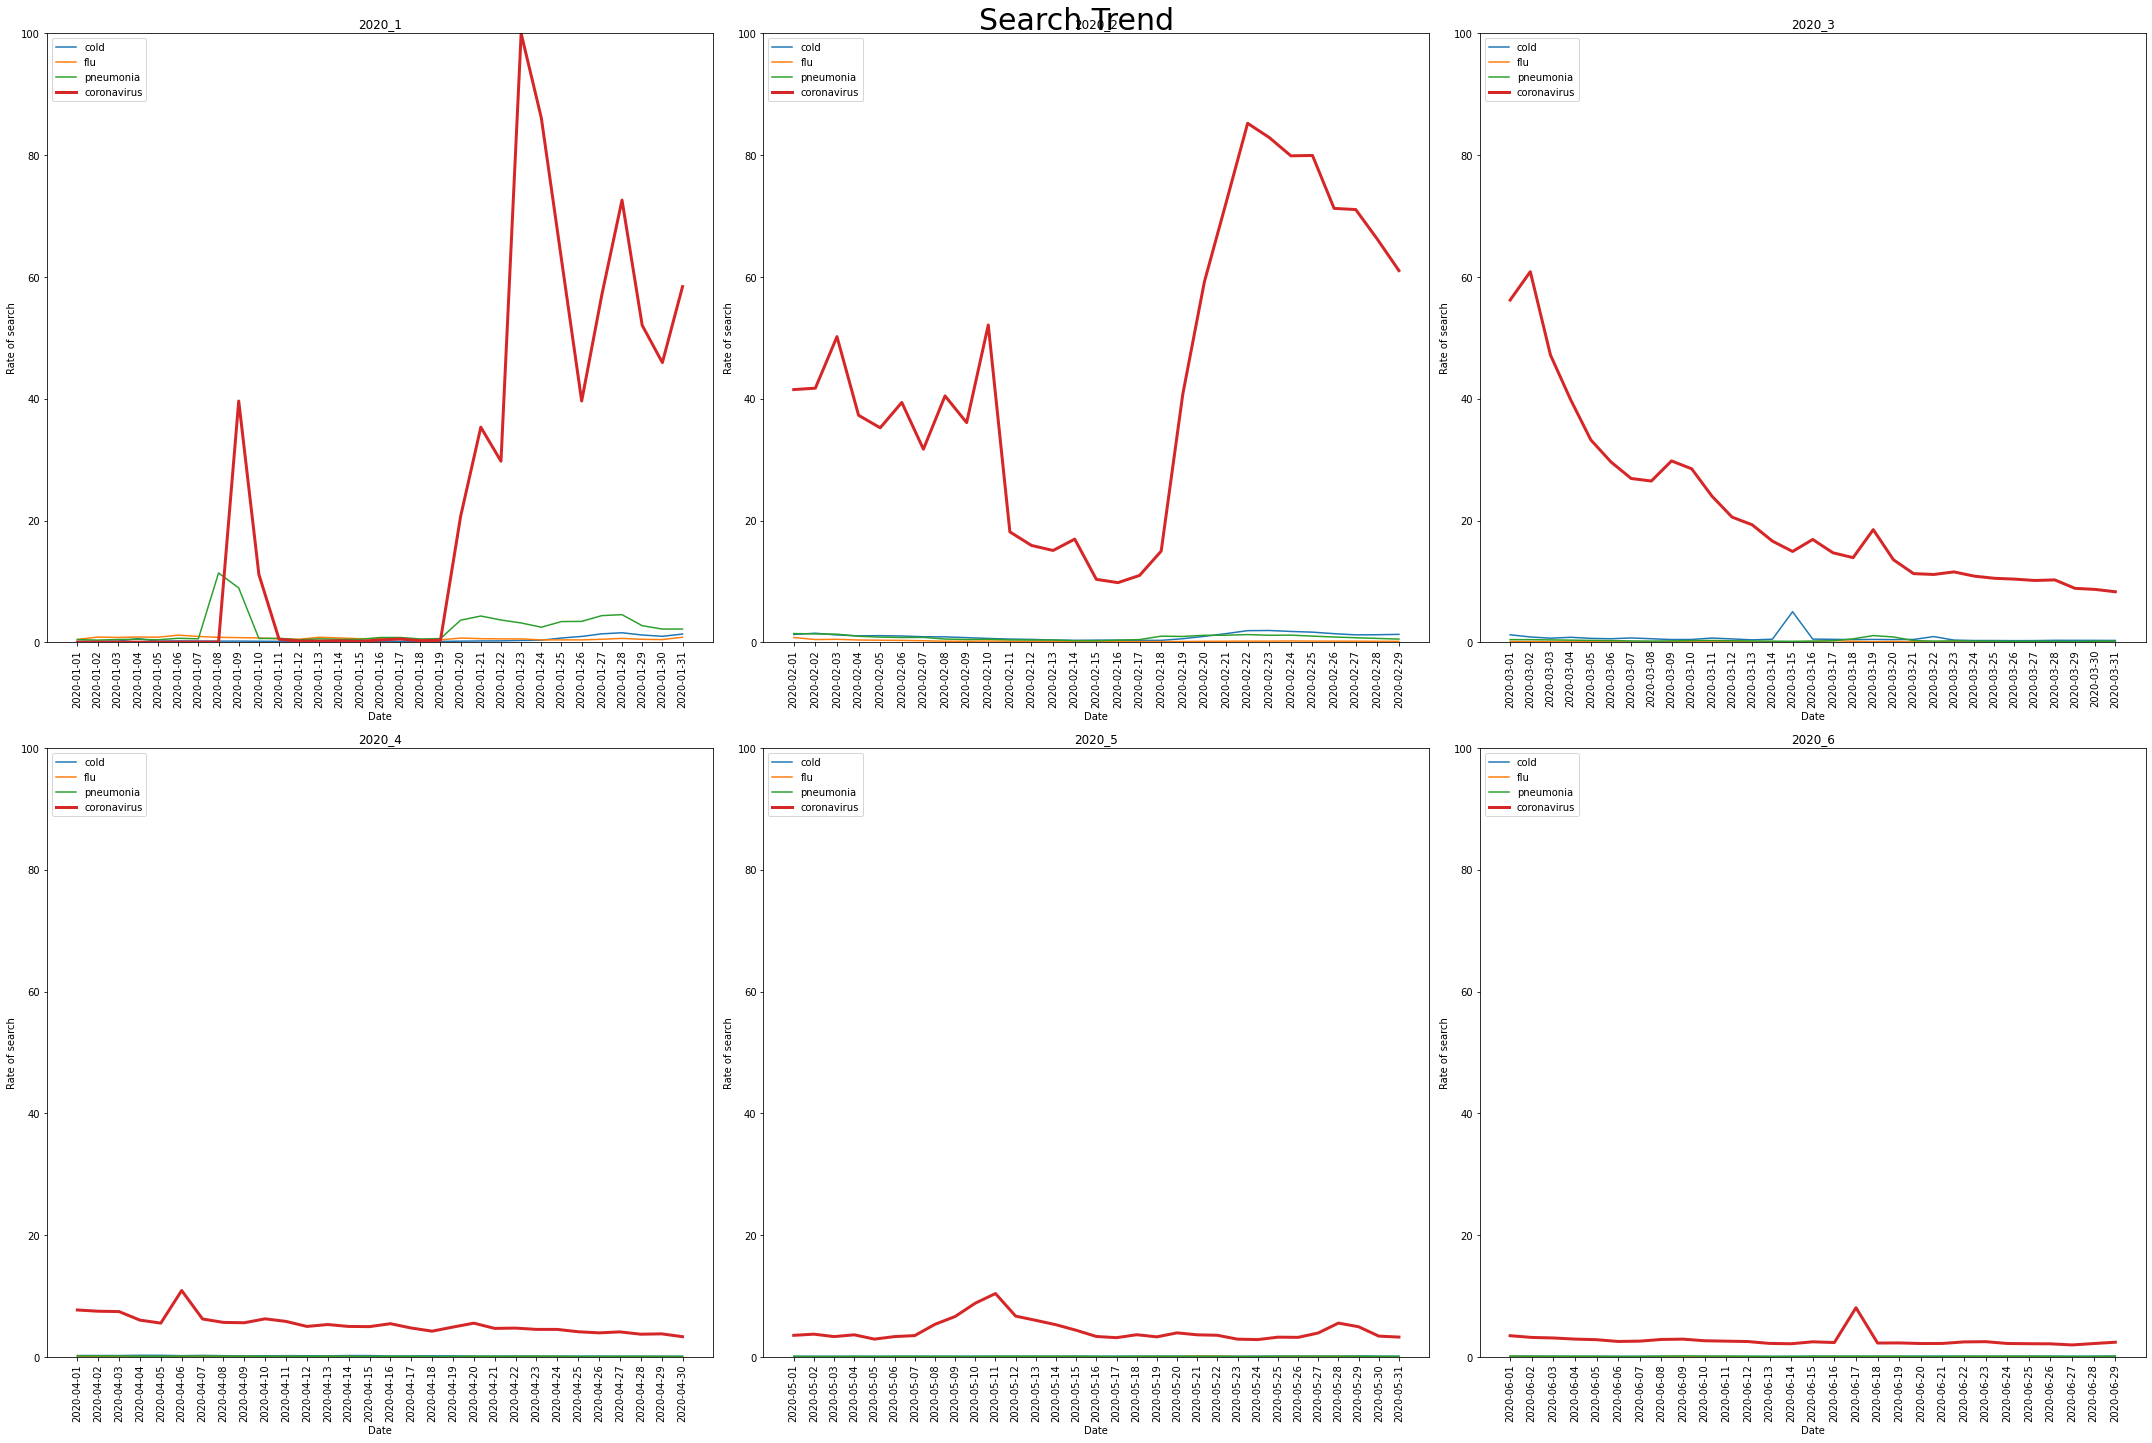

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))


for index, title, lists, times, yscope in zip(range(1,7), titleZip, searchList,timeList, stackScope):
  ax = plt.subplot(2,3,index)
 
  ax.plot(lists[:,0], lists[:,1], label="cold")
  ax.plot(lists[:,0], lists[:,2], label="flu")
  ax.plot(lists[:,0], lists[:,3], label="pneumonia")
  ax.plot(lists[:,0], lists[:,4], label="coronavirus", linewidth=3)
  plt.xticks(rotation='vertical')
  plt.xlabel('Date')
  plt.ylabel("Rate of search")
  plt.ylim([0,100])
  ax.legend(loc=2)
  plt.title(title)


plt.suptitle("Search Trend",size = 30, position=(0.5, 1.0))
plt.tight_layout()


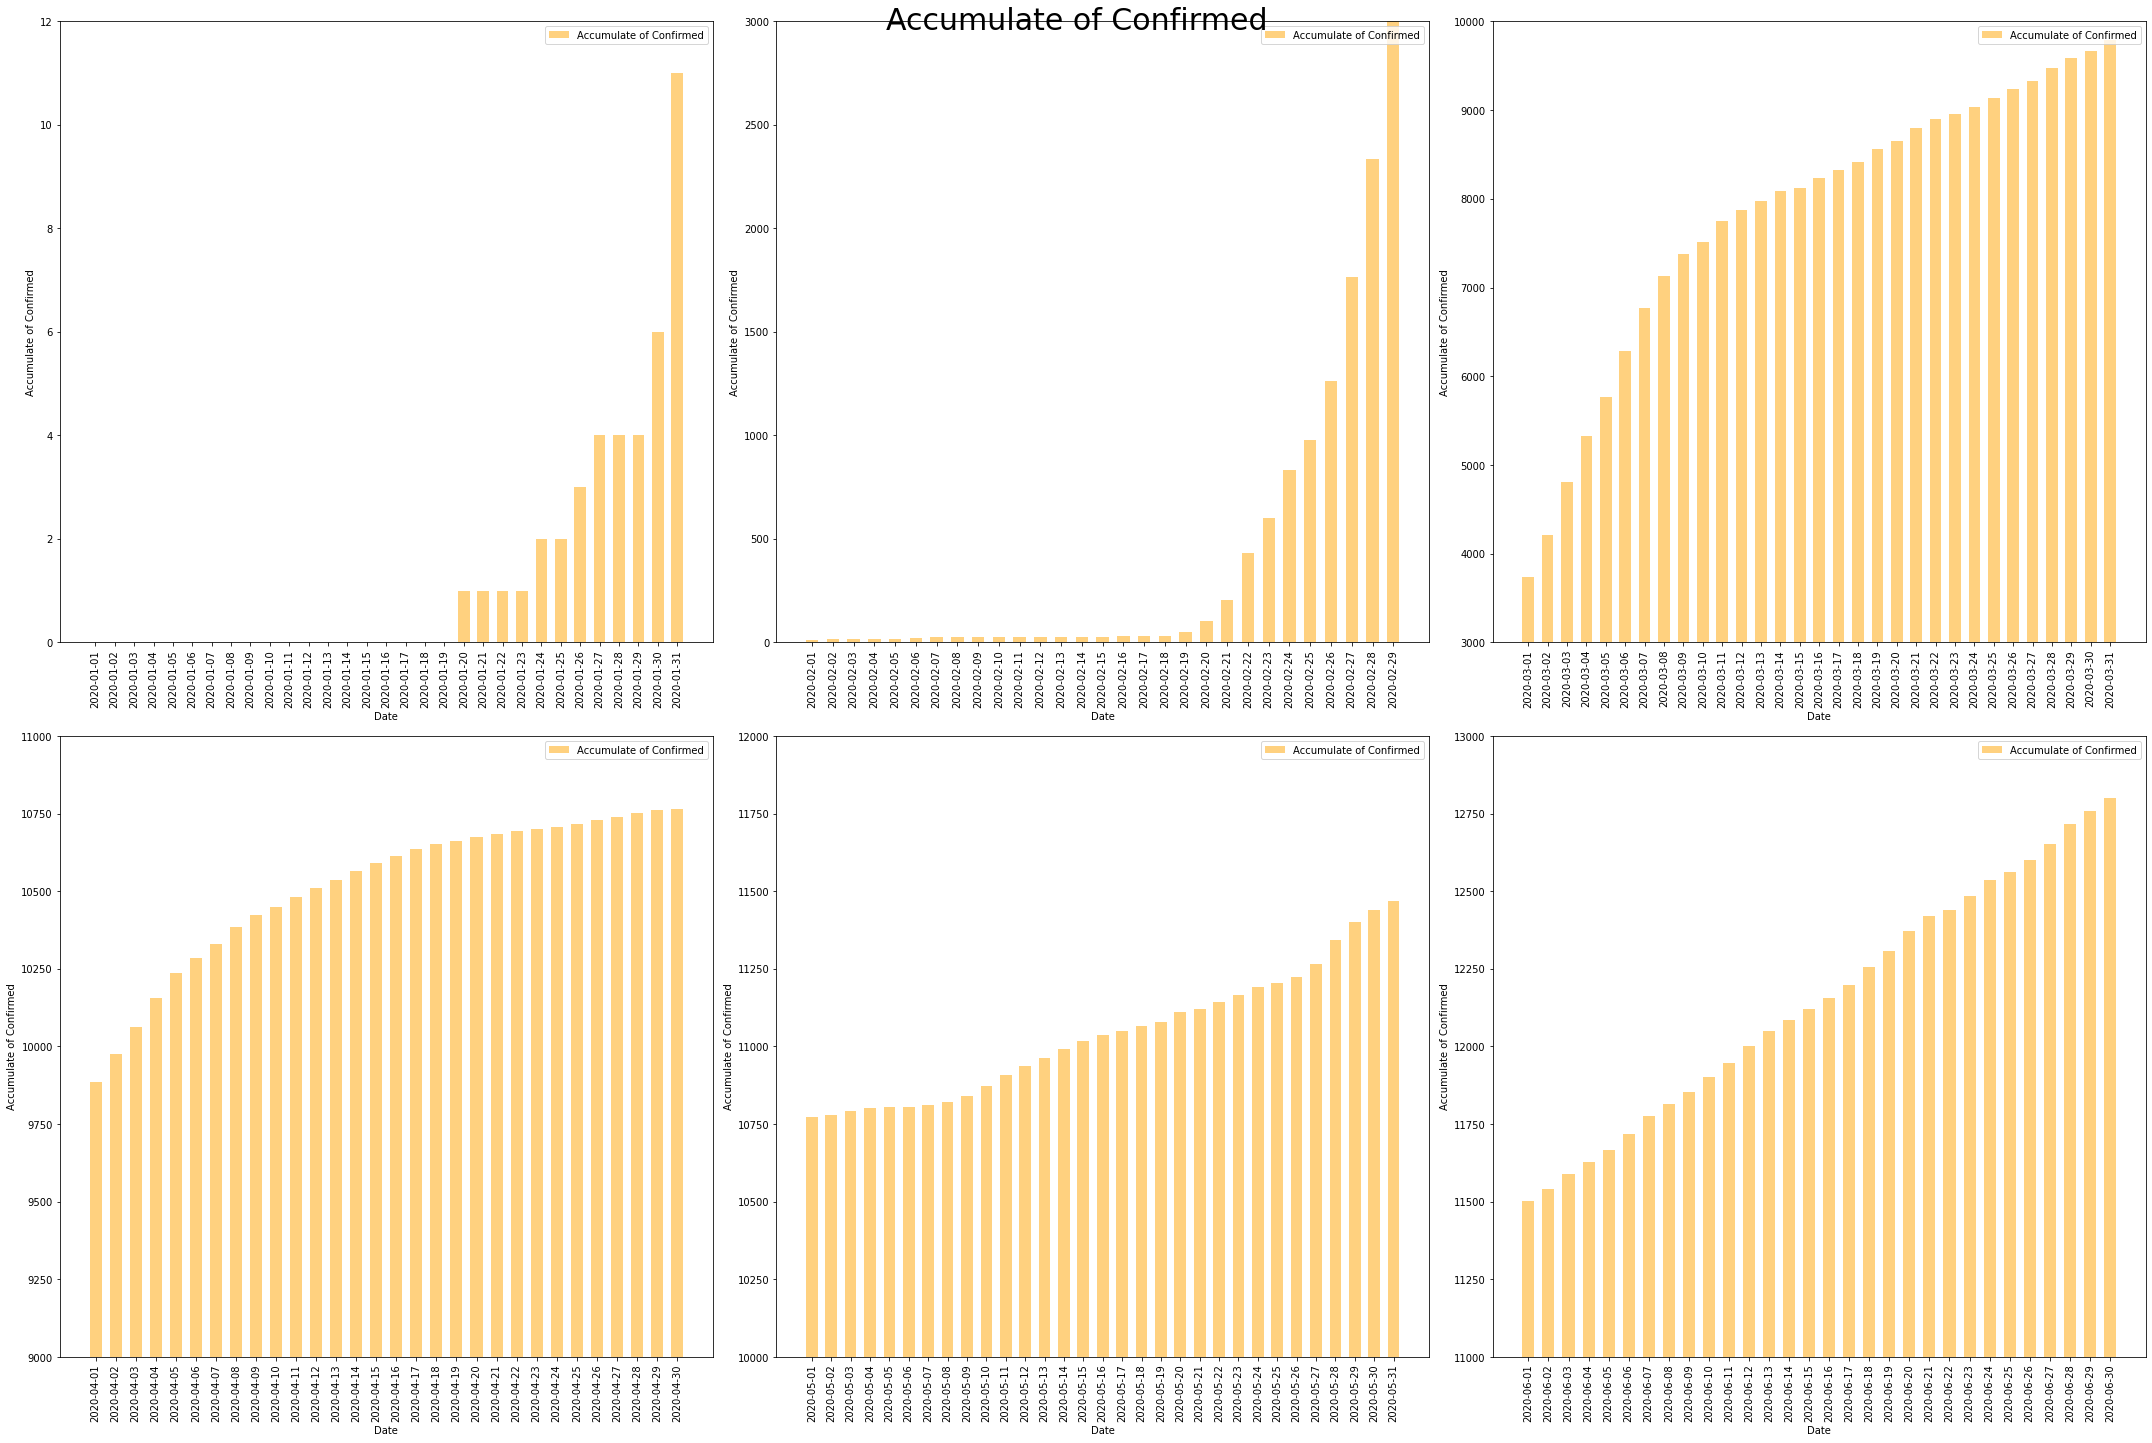

In [43]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

for index, title, lists, times, yscope in zip(range(1,7), titleZip, searchList,timeList, stackScope):
  ax = plt.subplot(2,3,index)
 

  plt.xticks(rotation='vertical')
  plt.xlabel('Date')

  ax.bar(times[:,0],times[:,1], label = 'Accumulate of Confirmed', width=0.6, color='orange', alpha=0.5)
  plt.ylim(yscope)
  plt.ylabel("Accumulate of Confirmed")
  ax.legend(loc=1)
  
  
plt.suptitle("Accumulate of Confirmed",size = 30, position=(0.5, 1.0))
plt.tight_layout()


<class 'numpy.ndarray'>


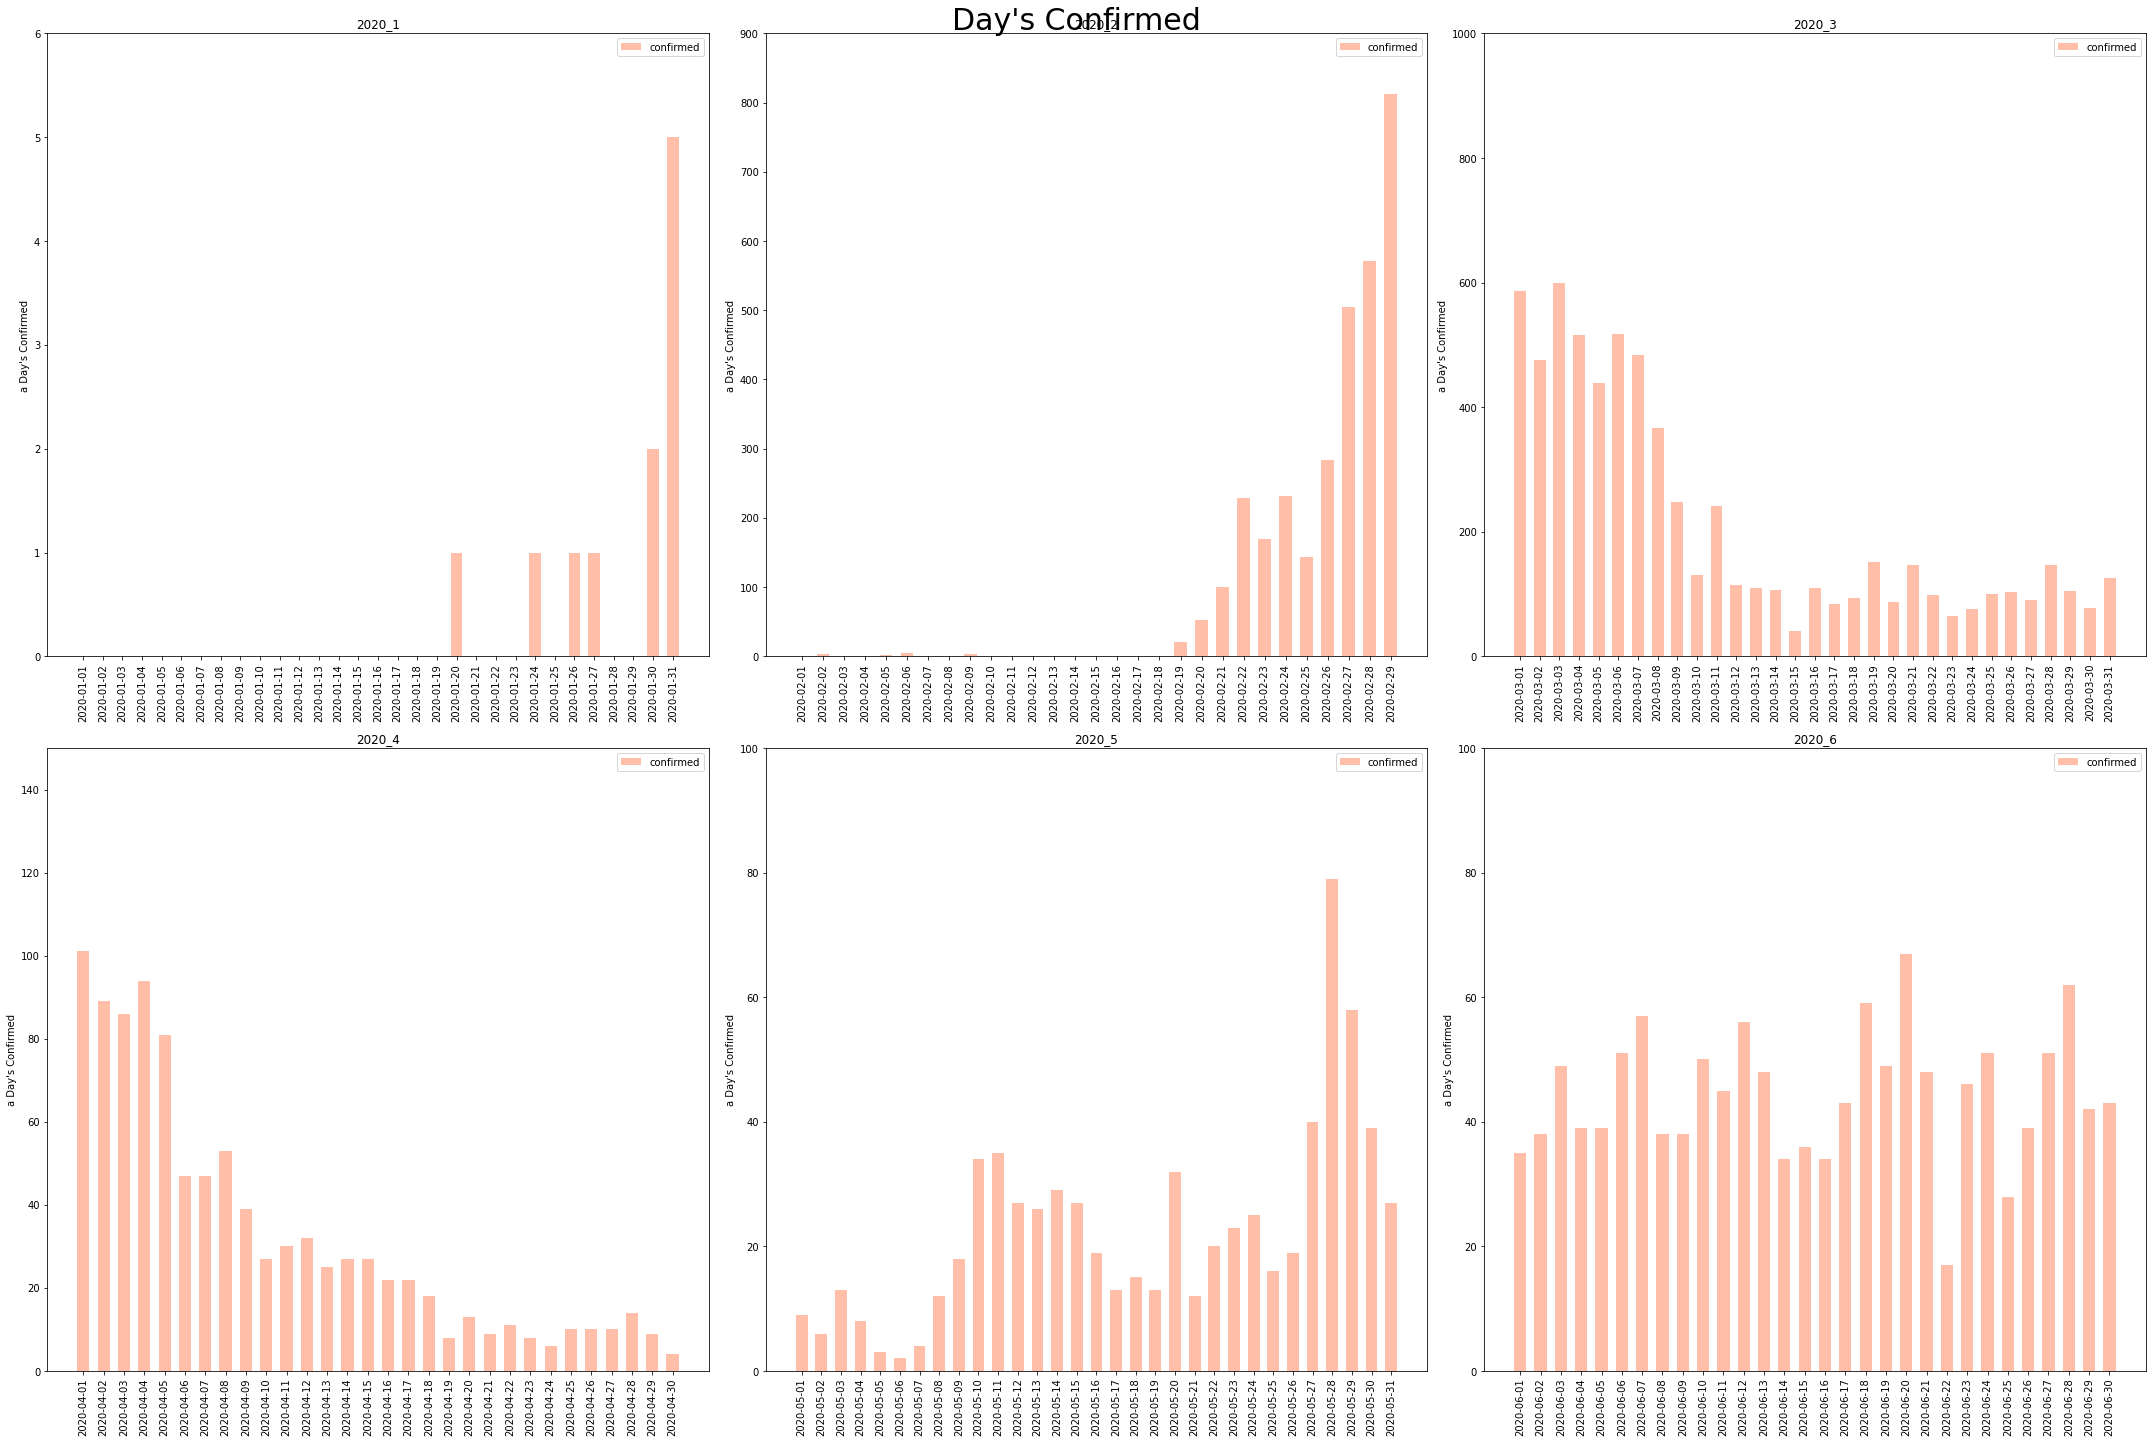

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
print(type(ax))


for index, title, lists, times, yscope in zip(range(1,7), titleZip, searchList,dayList, dayScope):
  ax = plt.subplot(2,3,index)
 
  plt.xticks(rotation='vertical')
  plt.title(title)
 
  ax.bar(times[:,0],times[:,1], label = 'confirmed', width=0.6, color='coral', alpha=0.5)
  plt.ylim(yscope)
  plt.ylabel("a Day's Confirmed")
  ax.legend(loc=1)


plt.suptitle("Day's Confirmed",size = 30, position=(0.5, 1.0))
plt.tight_layout()


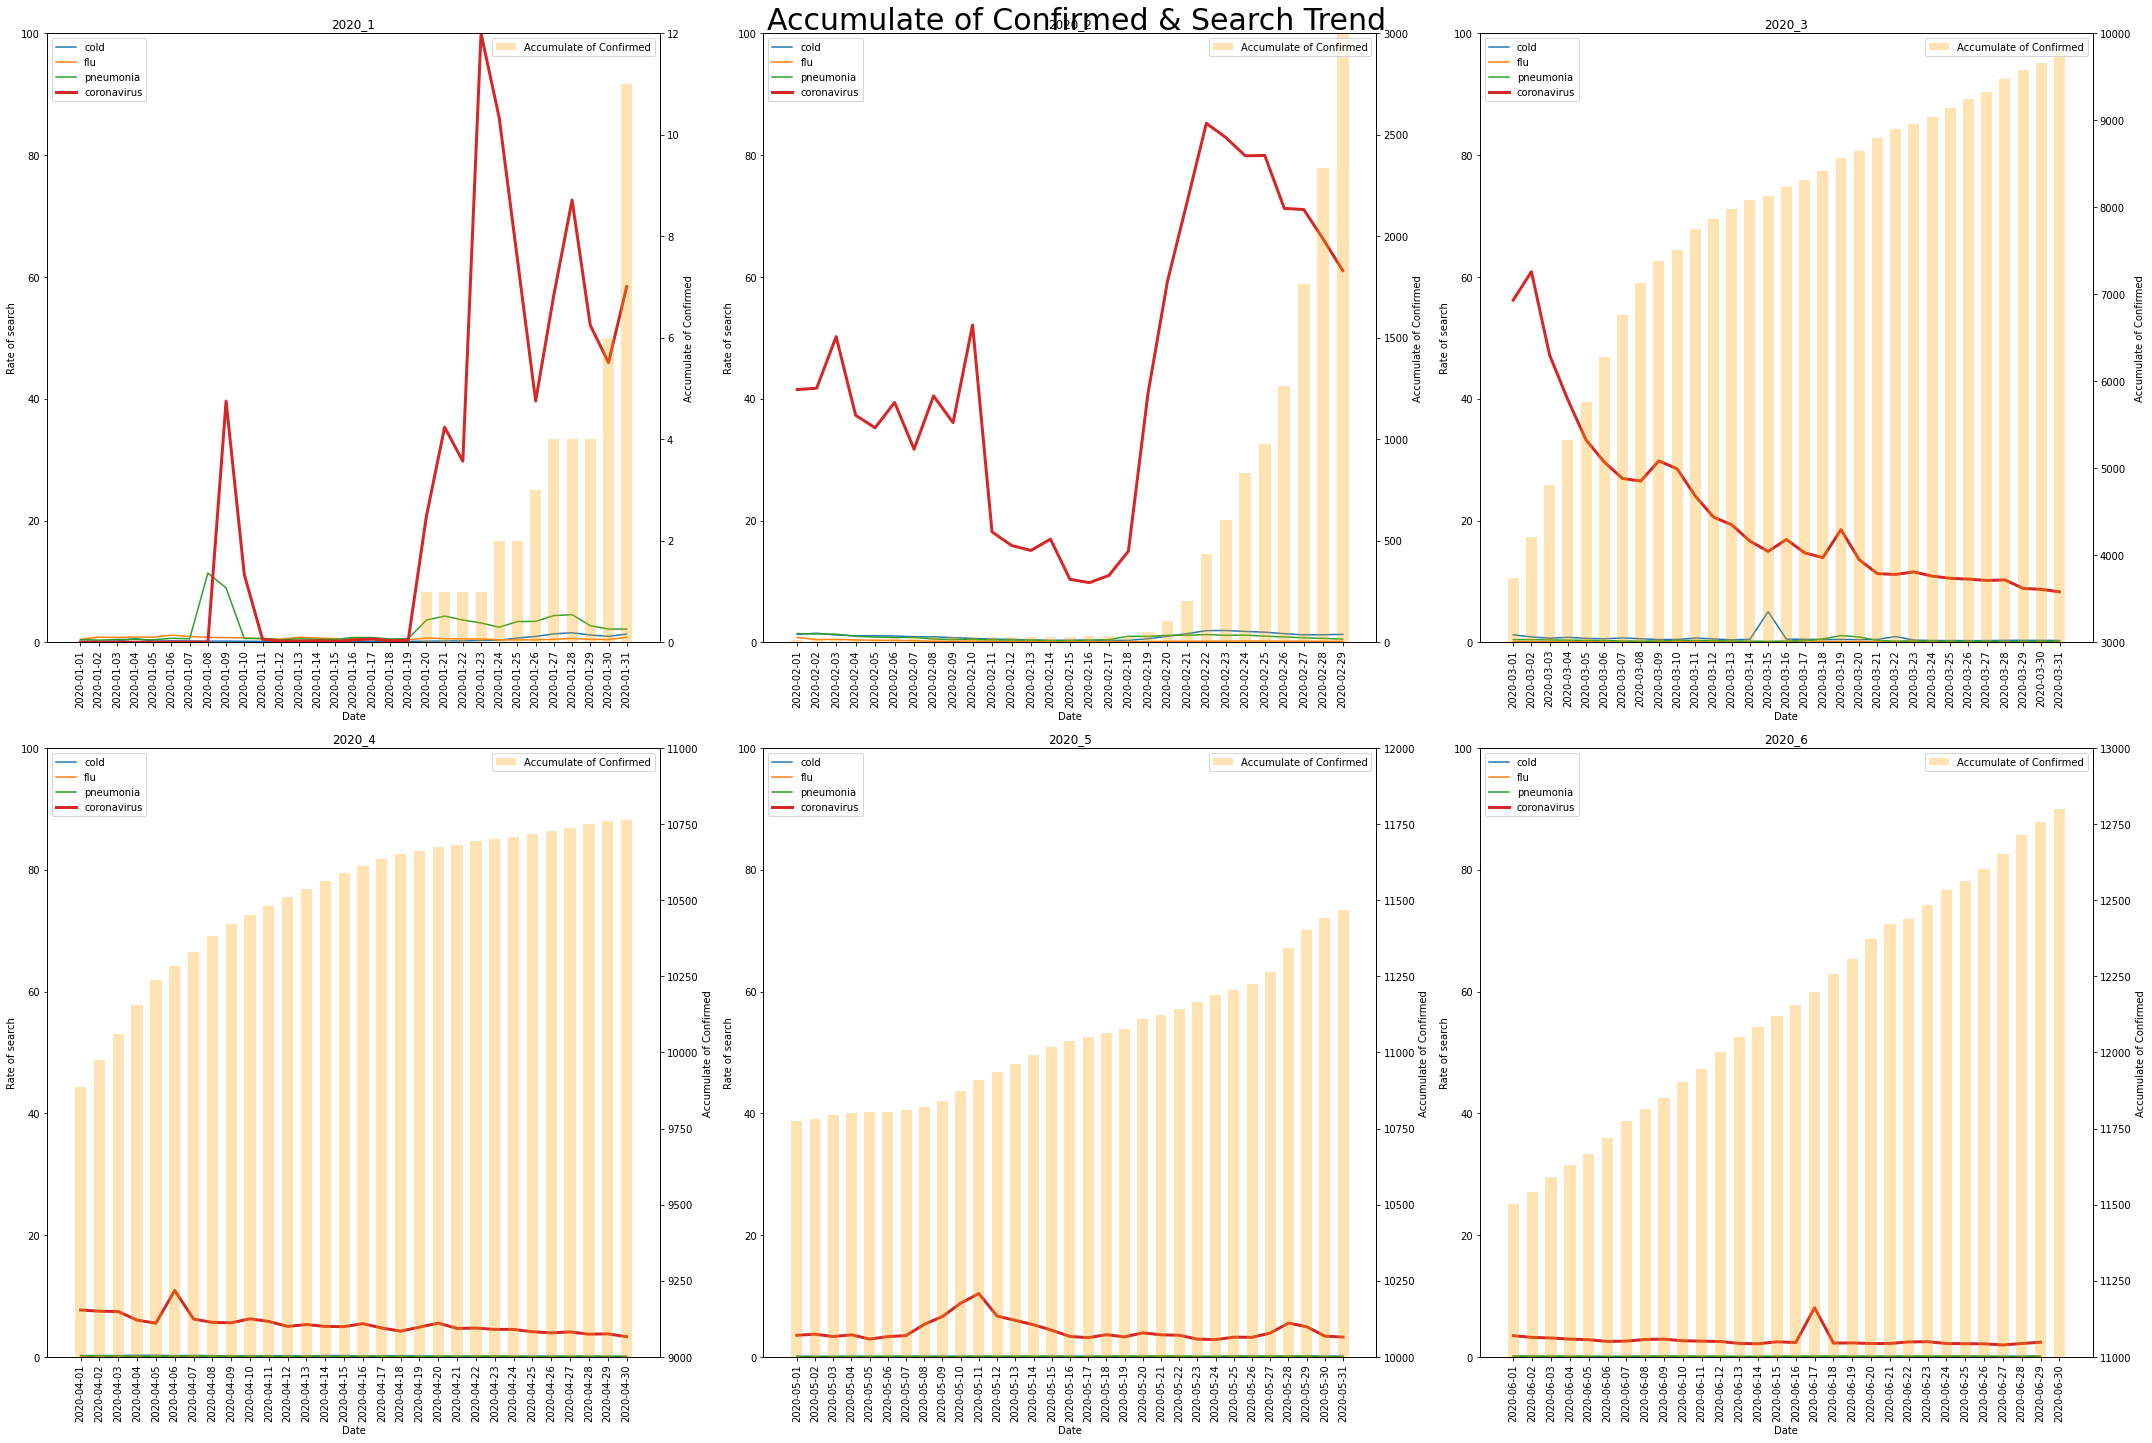

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

for index, title, lists, times, yscope in zip(range(1,7), titleZip, searchList,timeList, stackScope):
  ax = plt.subplot(2,3,index)
 
  ax.plot(lists[:,0], lists[:,1], label="cold")
  ax.plot(lists[:,0], lists[:,2], label="flu")
  ax.plot(lists[:,0], lists[:,3], label="pneumonia")
  ax.plot(lists[:,0], lists[:,4], label="coronavirus", linewidth=3)
  plt.xticks(rotation='vertical')
  plt.xlabel('Date')
  plt.ylabel("Rate of search")
  plt.ylim([0,100])
  ax.legend(loc=2)
  plt.title(title)

  ax = ax.twinx()

  ax.bar(times[:,0],times[:,1], label = 'Accumulate of Confirmed', width=0.6, color='orange', alpha=0.3)
  plt.ylim(yscope)
  plt.ylabel("Accumulate of Confirmed")
  ax.legend(loc=1)
  
 
plt.suptitle("Accumulate of Confirmed & Search Trend",size = 30, position=(0.5, 1.0))
plt.tight_layout()


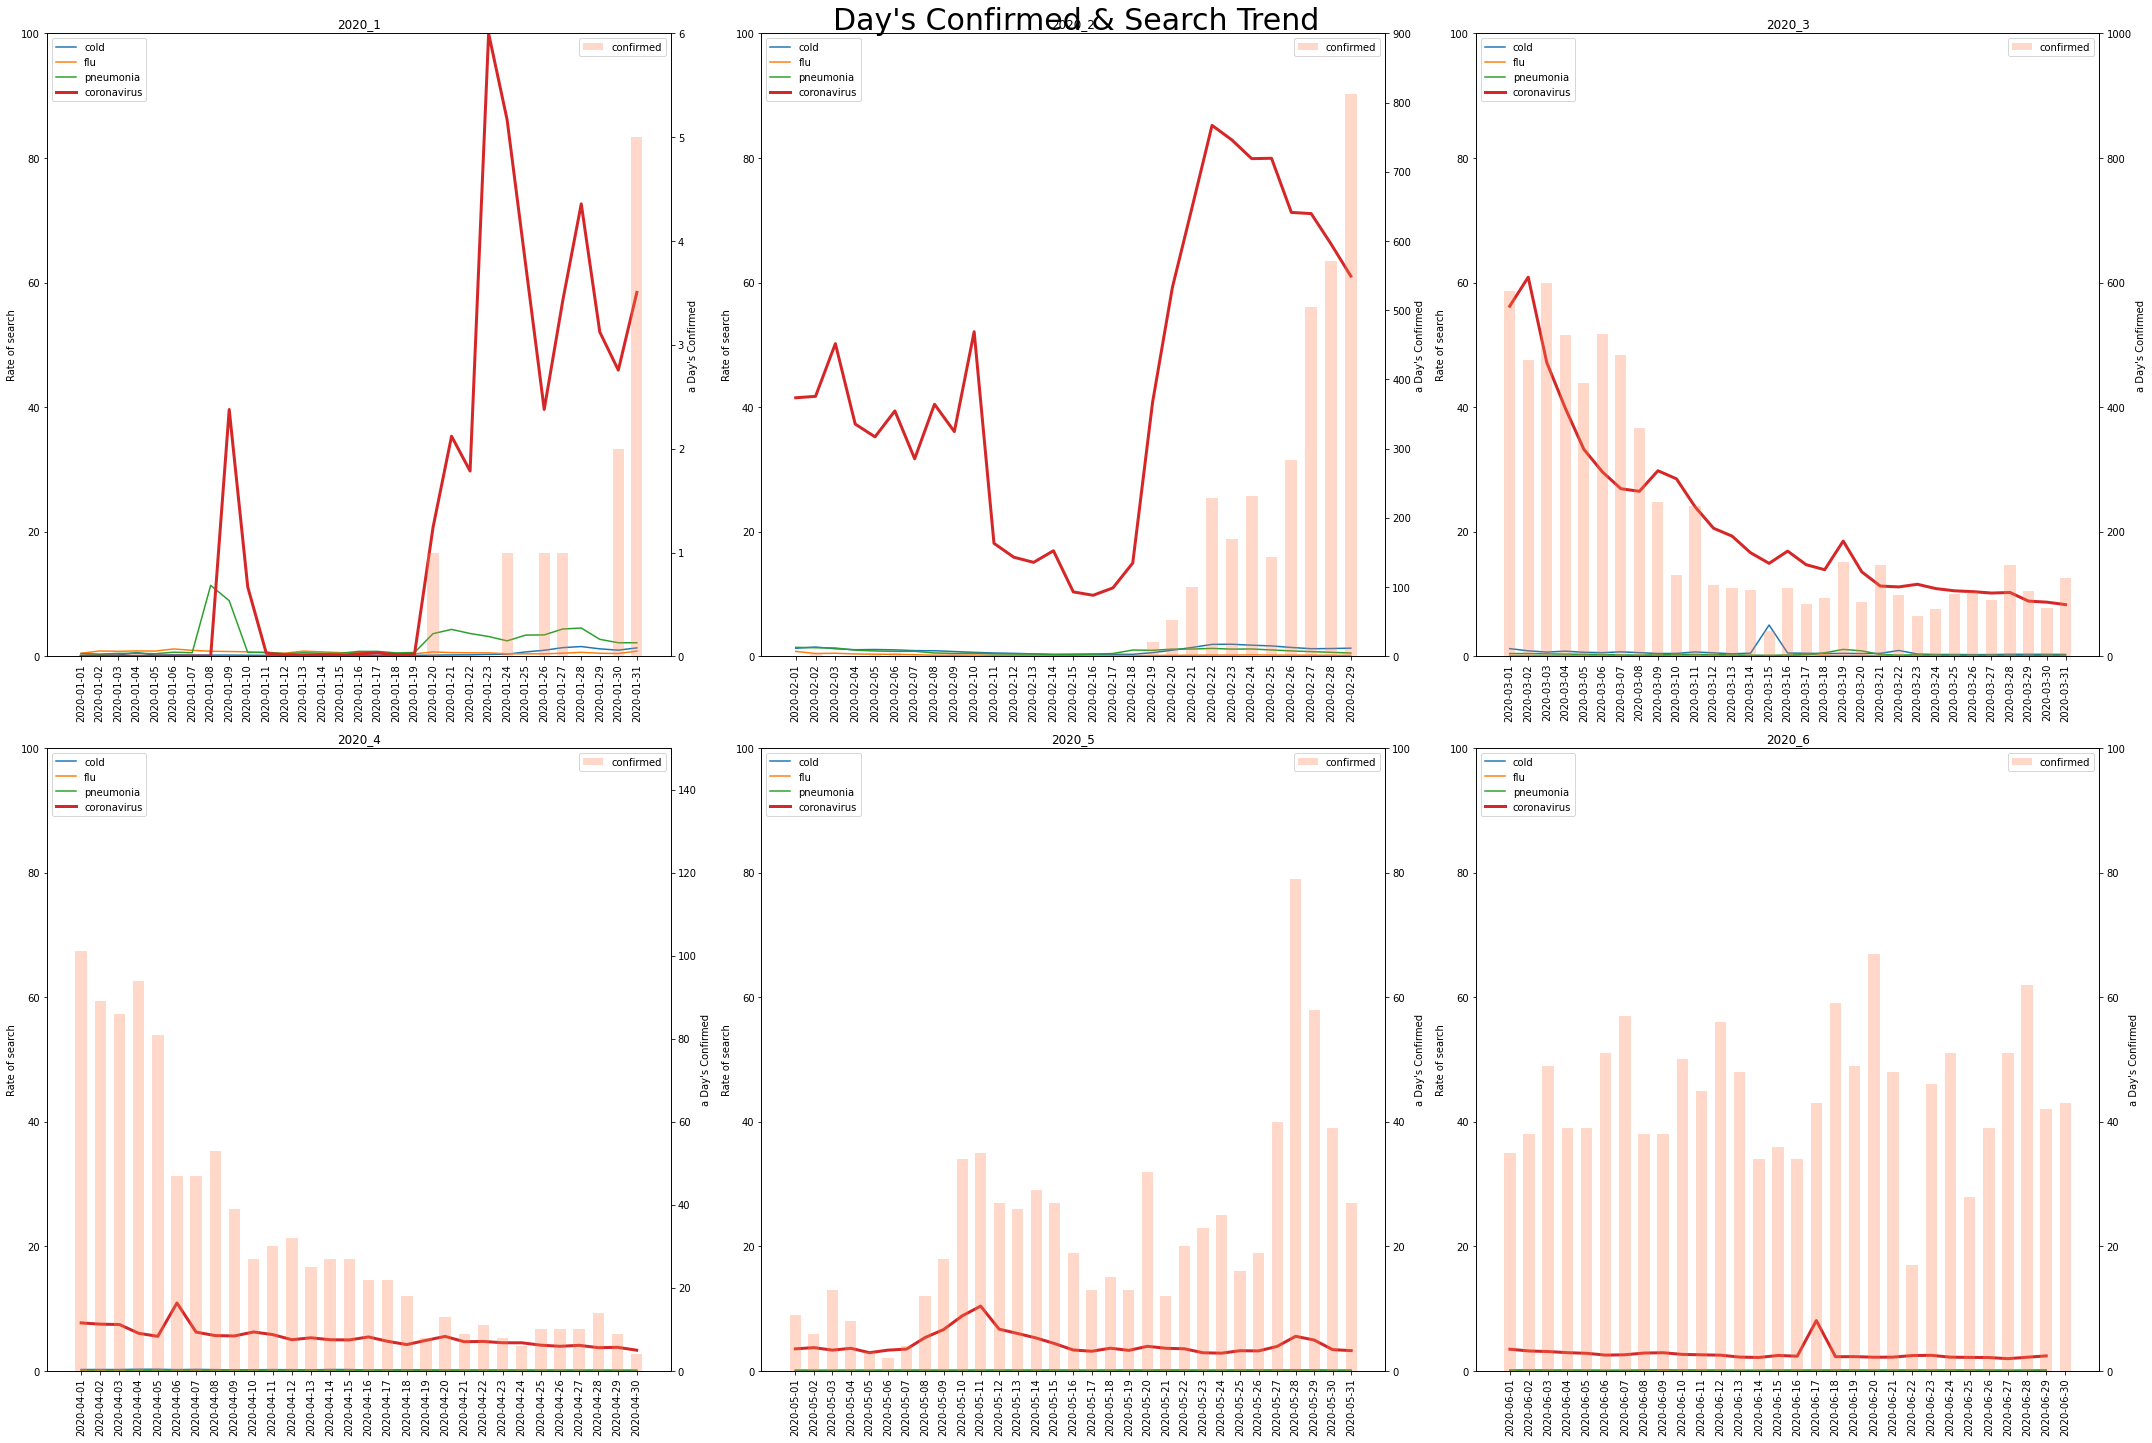

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

for index, title, lists, times, yscope in zip(range(1,7), titleZip, searchList,dayList, dayScope):
  ax = plt.subplot(2,3,index)

  ax.plot(lists[:,0], lists[:,1], label="cold")
  ax.plot(lists[:,0], lists[:,2], label="flu")
  ax.plot(lists[:,0], lists[:,3], label="pneumonia")
  ax.plot(lists[:,0], lists[:,4], label="coronavirus" ,  linewidth=3)
  plt.xticks(rotation='vertical')
  plt.ylabel("Rate of search")
  plt.ylim([0,100])
  ax.legend(loc=2)
  plt.title(title)

  ax = ax.twinx()
  
  ax.bar(times[:,0],times[:,1], label = 'confirmed', width=0.6, color='coral', alpha=0.3)
  plt.ylim(yscope)
  plt.ylabel("a Day's Confirmed")
  ax.legend(loc=1)
  
plt.suptitle("Day's Confirmed & Search Trend",size = 30, position=(0.5, 1.0))
plt.tight_layout()

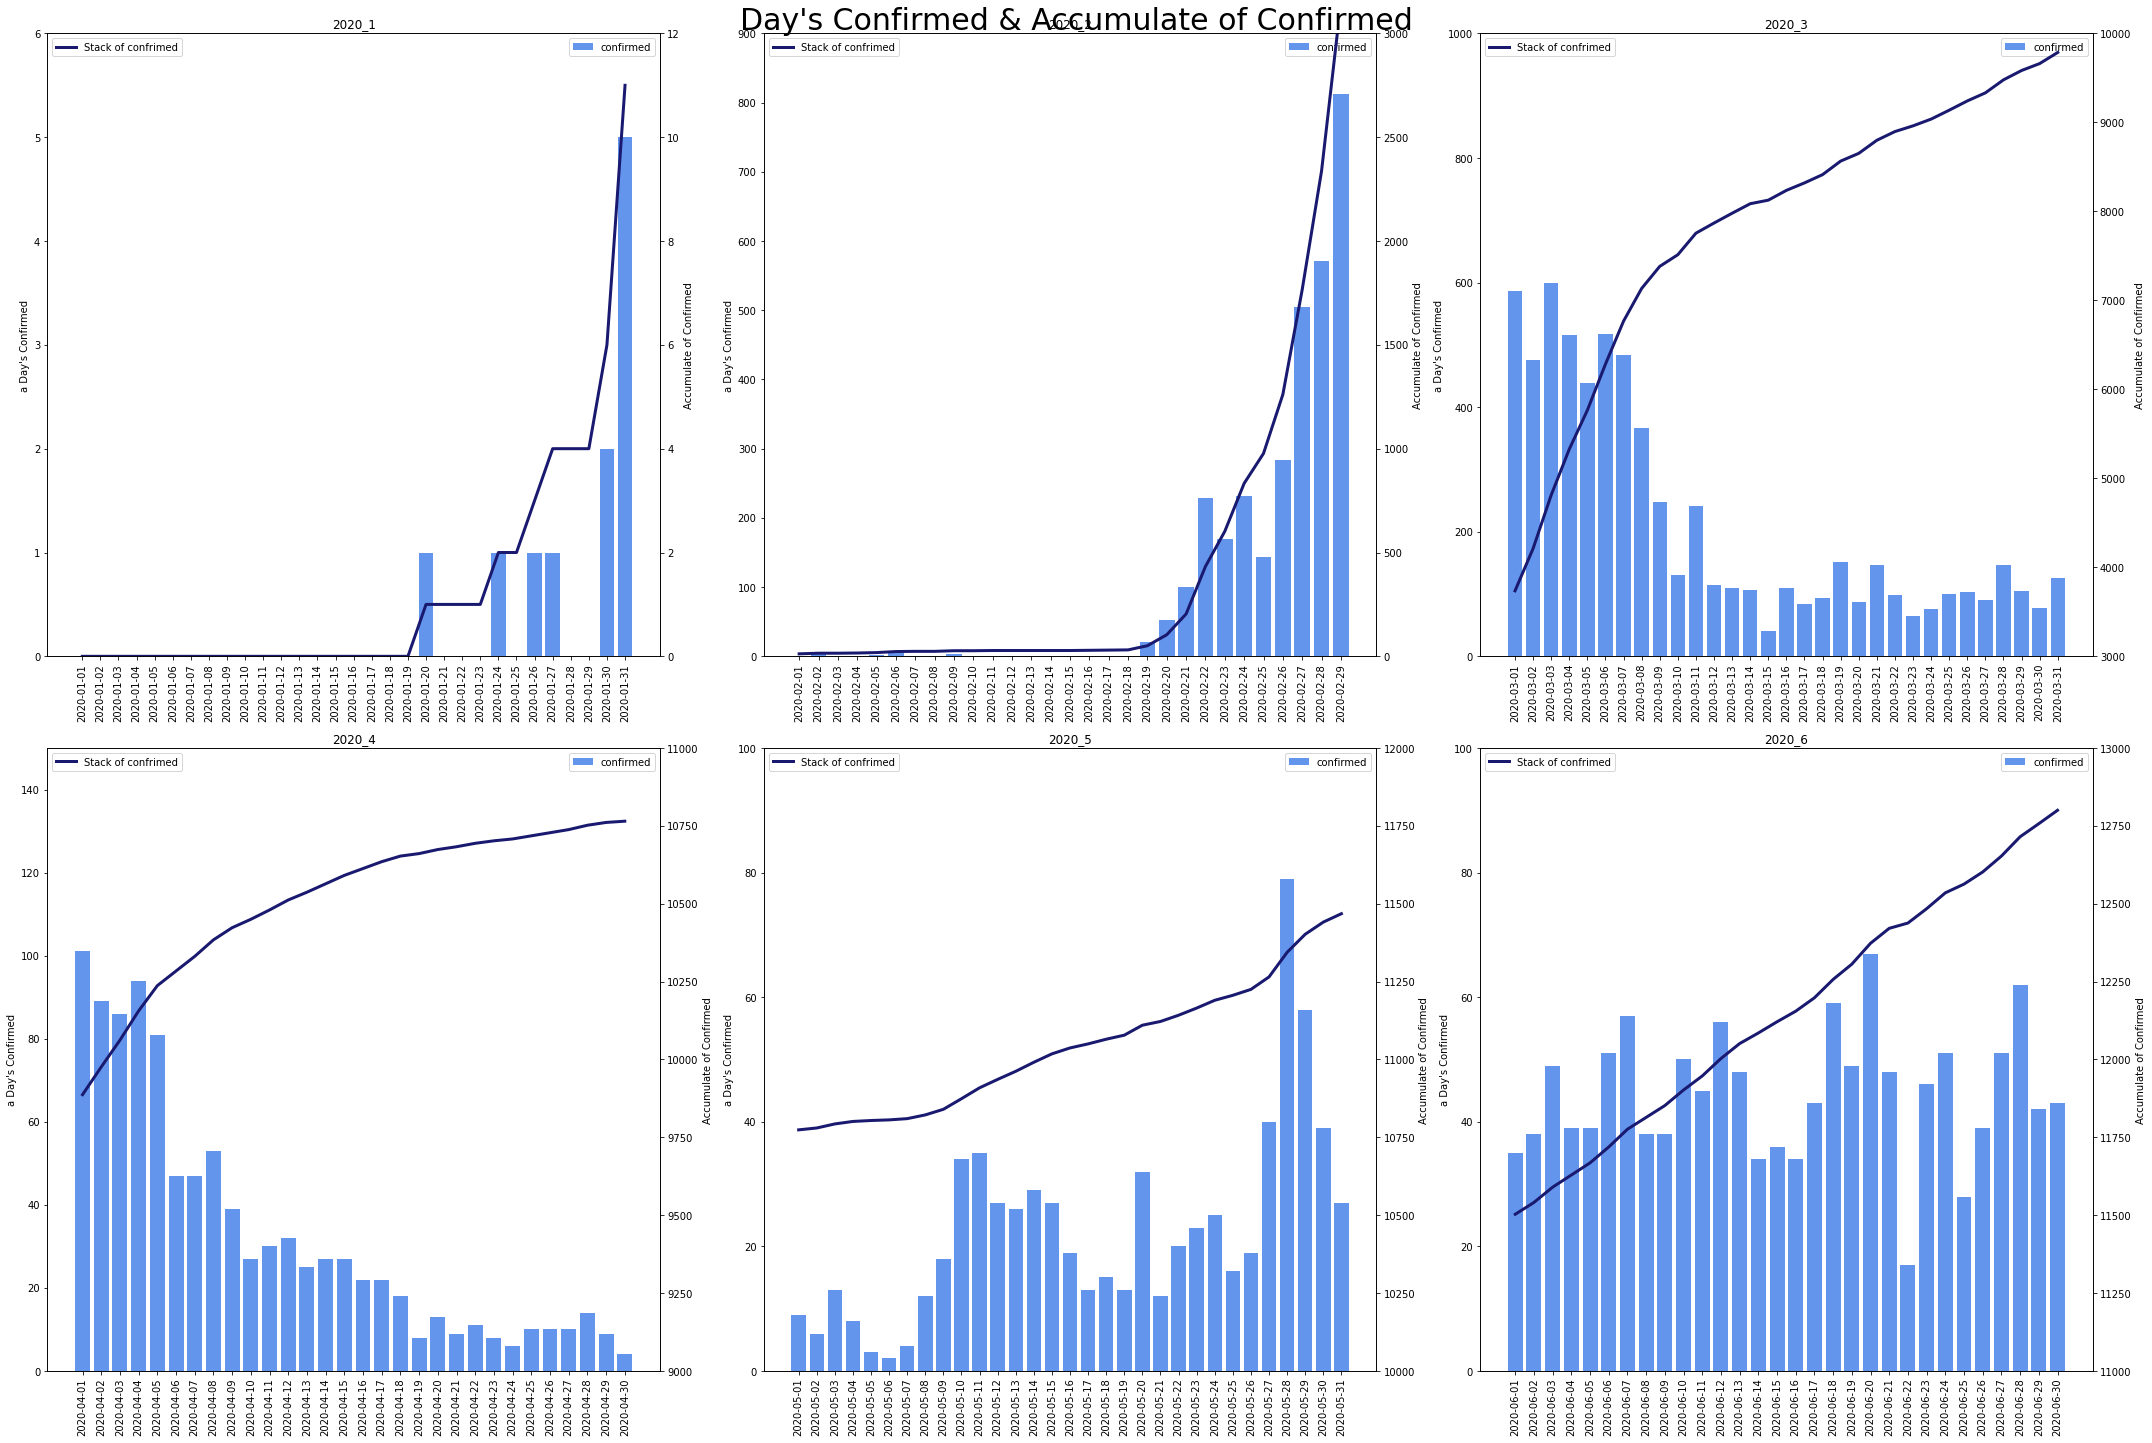

In [47]:

fig, ax = plt.subplots(2, 3, figsize=(30, 20))

for index, title, lists, times, stackscope,yscope in zip(range(1,7), titleZip, timeList,dayList,stackScope, dayScope):
  ax = plt.subplot(2,3,index)
  
  ax.bar(times[:,0],times[:,1], label = 'confirmed',color='cornflowerblue', linewidth=1)
  plt.ylabel("a Day's Confirmed")
  plt.xticks(rotation='vertical')
  plt.ylim(yscope)
  ax.legend(loc=1)

  ax = ax.twinx()
  
  ax.plot(lists[:,0], lists[:,1], label="Stack of confrimed",color='midnightblue', linewidth=3)
  
  plt.ylim(stackscope)
  ax.legend(loc=2)
  plt.title(title)
  plt.ylabel("Accumulate of Confirmed")
  
plt.suptitle("Day's Confirmed & Accumulate of Confirmed",size = 30, position=(0.5, 1.0))
plt.tight_layout()



In [48]:
print("공분산 - 일별 확진자 수 x 일별 키워드 검색 률 ")
print("1월")
print(np.cov( dayby1[:,1].astype(float), search2020_1[:,2].astype(float)))
print("2월")
print(np.cov( dayby2[:,1].astype(float), search2020_2[:,2].astype(float)))
print("3월")
print(np.cov( dayby3[:,1].astype(float), search2020_3[:,2].astype(float)))
print("4월")
print(np.cov( dayby4[:,1].astype(float), search2020_4[:,2].astype(float)))
print("5월")
print(np.cov( dayby5[:,1].astype(float), search2020_5[:,2].astype(float)))
print("6월")
print(np.cov(dayby6[:,1].astype(float), np.concatenate((search2020_6[:,2], [search2020_6[-1,-1]]), axis=0).astype(float)))


공분산 - 일별 확진자 수 x 일별 키워드 검색 률 
1월
[[ 9.69892473e-01 -1.78086022e-04]
 [-1.78086022e-04  3.77684116e-02]]
2월
[[ 4.11172611e+04 -5.30371010e+00]
 [-5.30371010e+00  2.17398835e-02]]
3월
[[3.20641957e+04 8.37329280e-01]
 [8.37329280e-01 1.79607043e-03]]
4월
[[8.57619540e+02 1.60626391e-01]
 [1.60626391e-01 1.37541115e-04]]
5월
[[2.65959140e+02 1.93213548e-02]
 [1.93213548e-02 4.54770816e-04]]
6월
[[109.48965517  -0.148934  ]
 [ -0.148934     0.18896602]]


In [49]:

print("정규화 공분산 - 일별 확진자 수 x 일별 키워드 검색 률 ")
print("1월")
print(np.corrcoef( dayby1[:,1].astype(float), search2020_1[:,2].astype(float)))
print("2월")
print(np.corrcoef( dayby2[:,1].astype(float), search2020_2[:,2].astype(float)))
print("3월")
print(np.corrcoef( dayby3[:,1].astype(float), search2020_3[:,2].astype(float)))
print("4월")
print(np.corrcoef( dayby4[:,1].astype(float), search2020_4[:,2].astype(float)))
print("5월")
print(np.corrcoef( dayby5[:,1].astype(float), search2020_5[:,2].astype(float)))
print("6월")
print(np.corrcoef(dayby6[:,1].astype(float), np.concatenate((search2020_6[:,2], [search2020_6[-1,-1]]), axis=0).astype(float)))



정규화 공분산 - 일별 확진자 수 x 일별 키워드 검색 률 
1월
[[ 1.0000000e+00 -9.3047279e-04]
 [-9.3047279e-04  1.0000000e+00]]
2월
[[ 1.         -0.17739406]
 [-0.17739406  1.        ]]
3월
[[1.         0.11033783]
 [0.11033783 1.        ]]
4월
[[1.         0.46768484]
 [0.46768484 1.        ]]
5월
[[1.         0.05555637]
 [0.05555637 1.        ]]
6월
[[ 1.         -0.03274277]
 [-0.03274277  1.        ]]
